## 탐색적 데이터 분석의 과정
### 데이터와의 첫 만남
* raw data : 아직 분석에 활용된 적이 없는 혹은 정제되지 않은 데이터
1. 데이터의 출처와 주제에 대해 이해
2. 데이터의 크기를 알아보기
    샘플링 : 어떤 자료로부터 일부의 값을 추출하는 행위
3. 데이터의 구성 요소(피처)를 살펴봄
    ex) 학급의 신체검사 결과를 기록한 데이터가 있을 때 키, 몸무게, 시력 같은 특정 요소를 '피처'
    
## 멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석하기
### step1 탐색: 데이터의 기초 정보 살펴보기

In [1]:
import pandas as pd

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
file_path = 'data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')

print(chipo.shape) # shape() : 데이터의 행과 열의 크기 반환
print("------------------------------------")
print(chipo.info()) # info() 행의 구성 정보와 열의 구성 정보를 나타냄

(4622, 5)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


* choice_description 에는 3376개의 비어있지 않은 문자열 데이터가 있음
* 1246개의 결측값이 존재

In [2]:
# chipo 라는 Dataframe에서 순서대로 10개의 row 데이터를 보여줍니다.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
print(chipo.columns)
print("------------------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
------------------------------------
RangeIndex(start=0, stop=4622, step=1)


* order_id : 주문번호
* quantity : 아이템의 주문 수량
* item_name : 주문한 아이템의 이름
* coice_description : 주문한 아이템의 상세 선택 옵션
* item_price : 주문 아이템의 가격 정보

#### quantity와 item_price의 수치적 특징
* 두 피처는 연속형 피처(연속적인 숫자 형태)

In [4]:
# describe()함수로 기초 통계량 출력하기
# 현재 유일하게 존재하는 수치형 피처는 quantity 뿐이기 때문에 오직 quantity에 대한 정보만을 출력
# order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환
chipo['order_id'] = chipo['order_id'].astype(str)
print(chipo.describe()) # chipo 데이터 프레임에서 수치형 피처들의 기초 통계량을 확인

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


#### order_id와 item_name의 개수
* 두 피처는 범주형 피처이기 때문에 unique() 함수를 사용
* 이를 통해 피처 내에 몇개의 범주가 있는지를 확인할 수 있음

In [5]:
# unique() 함수로 범주형 피처의 개수 출력하기
print(len(chipo['order_id'].unique())) # order_id의 개수를 출력
print(len(chipo['item_name'].unique())) # item_name의 개수를 출력

1834
50


### step2 인사이트의 발견 : 탐색과 시각화하기
#### 가장 많이 주문한 아이템 Top10
* DatatFrame['column']은 시리즈라는 객체를 반환
* value_counts() 함수는 오로지 이러한 시리즈 객체에만 적용

In [6]:
# 가장 많이 주문한 아이템 Top10을 출력
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val,cnt) in enumerate(item_count.iteritems(),1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


#### 아이템별 주문 개수와 총량
* groupby() 함수는 데이터 프레임에서 특정 피처를 기준으로 그룹을 생성하며 이를 통해 그룹별 연산을 적용할 수 있음
- 아이템별 주문 개수와 총량을 구해보자

In [7]:
# 아이템별 주문 개수를 출력
order_count = chipo.groupby('item_name')['order_id'].count() # (): by=""그룹화할 컬럼명, []: 연산을 할 컬럼을 인덱싱
order_count[:10] # 아이템별 주문 개수를 출력

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [8]:
# 아이템별 주문 총량을 계산
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # 아이템별 주문 총량을 출력

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

#### 시각화
- 아이템별 주문의 총량을 막대 그래프로 시각화
- tolist()와 넘파이의 arrange() 함수를 이용해 x_pos를 선언
- 0~50까지의 숫자를 그래프의 x축 이름으로 사용(50개의 아이템의 이름을 x축에 표현하기에는 그래프의 공간이 부족)
- y값(order_cnt)에는 주문 총량에 해당하는 값인 item_quantity.values.tolist()를 넣어줌

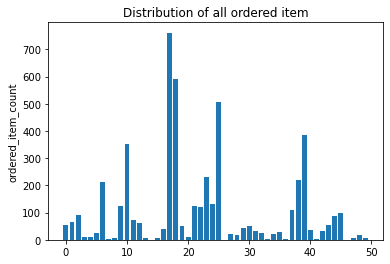

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist() #2차원 array에 tolist를 적용시키면 list속에 다른 list가 있는 2차원 list의 형태로 반환
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

### step 3 데이터 전처리 : 전처리 함수 사용하기

In [10]:
#item_price 피처 살펴보기
print(chipo.info())
print("-------------")
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

- item_price 피처에서 가격을 나타내는 숫자 앞에 달러 기호가 붙어 있음
- 이 피처를 수치 데이터로 사용하기 위해서는 달러 기호를 제거해주는 전처리 작업이 필요

In [11]:
# apply()와 lambda를 이용해 데이터 전처리하기
# column 단위 데이터에 apply()함수로 전처리를 적용
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


- apply() 함수는 시리즈 단위의 연산을 처리하는 기능을 수행, sum()이나 mean()과 같이 연산이 정의된 함수를 파라미터로 받음
- 피처 단위의 합계나 평균을 구할 수도 있고 
- 사용자가 정의할 새로운 함수 문자열 데이터에서 첫번째 문자열을 제거한뒤 나머지 문자열을 수치형으로 바꿔주는 함수를 파라미터로 입력할 수도 있음
- lambda x: float(x[1:]) 는 이를 수행하는 함수를 lambda로 정의하여 입력한 것

### step 4 탐색적 분석 : 스무고개로 개념적 탐색 분석하기
#### 주문당 평균 계산금액 출력
- order_id로 그룹을 생성한 뒤, item_price 피처에 sum()함수를 적용하고 mean()함수 추가

In [12]:
# 주문당 평균 계산 금액을 출력
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

- 한사람이 '약 18달러 가량의 주문을 할 것' 이라는 인사이트 얻을 수 있음

#### 한 주문에 10달러 이상 지불한 주문번호(id) 출력
- order_id 피처(하나의 주문)를 기준으로 그룹을 만들어 quantity, item_price 피처의 합계를 계산
- 이 결과에서 10 이상인 값을 필터링
- 이에 대한 최종 결과인 results의 index.values를 출력하면 한 주문에 10달러 이상 지불한 id를 출력할 수 있음

In [13]:
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


#### 각 아이템의 가격 구하기
1. chipo[chipo.quantity == 1]으로 동일 아이템을 1개만 구매한 주문을 선별
2. item_name을 기준으로 groupby 연산을 수행한 뒤, min() 함수로 각 그룹별 최저가를 계산
3. item_price를 기준으로 정렬하는 sort_values() 함수를 적용. sort_values() 는 series 데이터를 정렬해주는 함수

In [14]:
# 각 아이템의 가격 계산
chipo_one_item = chipo[chipo.quantity==1]
price_per_item = chipo_one_item.groupby('item_name').min() # 토핑이 아예 올라가지 않은 메뉴를 찾기 위해
price_per_item.sort_values(by = "item_price", ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


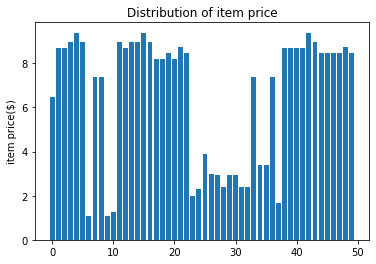

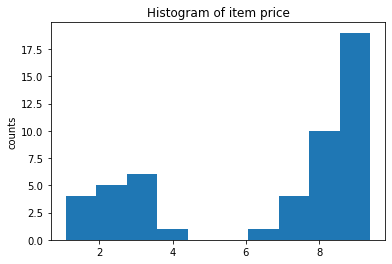

In [15]:
# 아이템 가격 분포 그래프를 출력
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

# 아이템 가격 히스토그램을 출력
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

#### 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기
- order_id에 그룹별 합계 연산을 적용
- item_price를 기준으로 sort_values를 반환하면 가장 비싼 주문순으로 연산 결과를 얻을 수 있음

In [16]:
# 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 계산
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


#### 'Veggie Salad Bowl'이 몇 번 주문되었는지 구하기
- chipo[chipo['item_name'] == "Veggie Salad Bowl"]으로 필터링
- drop_duplicates() 함수 사용. 한 주문 내에서 item_name이 중복 집계된 경우를 제거
- 최종 결과인 chipo_salad 길이를 출력하면 Veggie Salad Bowl이 데이터 내에서 몇번이나 주문되었는지 구할 수 있음

In [17]:
# 'Veggie Salad Bowl'이 몇 번 주문되었는지를 계산
chipo_salad = chipo[chipo['item_name']=="Veggie Salad Bowl"]
#한 주문내에서 중복 집계된 item_name을 제거
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


- Veggie Salad Bowl은 총 18번 주문됨

#### 'Chicken Bowl'을 2개 이상 주문한 고객들의 'Chicken Bowl'메뉴에 대한 총 주문 수량 구하기
- 'Chicken Bowl'을 주문한 데이터만을 필터링
- groupby 함수를 이용해 order_id 마다의 quantity를 전부 더함
- 데이터프레임에서 quantity가 2 이상인 것을 선택. 이 결과가 2개 이상 주문한 고객들의 총 주문 수량 의미

In [18]:
# “Chicken Bowl”을 2개 이상 주문한 주문 횟수를 구한다
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]
print(chipo_chicken_result.shape[0])

33


In [19]:
# 'Chicken Bowl'을 2개 이상 주문한 고객들의 'Chicken Bowl' 메뉴의 총 주문 수량을 구한다
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64

## 국가별 음주 데이터 분석하기
### step 1 탐색 : 데이터의 기초 정보 살펴보기
- country: 국가 정보
- beer_servings: beer 소비량
- spirit_servings: spirit 소비량
- wine_servings: wine 소비량
- total_litres_of_pure_alcohol: 총 알코올 소비량
- continent: 국가의 대륙 정보

In [20]:
# drinks 데이터셋의 기초 정보 출력하기
# info() 함수로 데이터의 기초적인 정보 보기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path ='data/drinks.csv'
drinks = pd.read_csv(file_path) #read_csv() 함수로 데이터를 데이터 프레임 형태로 불러온다
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


- 총 193개의 데이터가 있음
- country와 continent를 제외한 피처들은 수치형 피처로 구성되어 있음
- continent 피처는 23개의 결측값 존재

In [21]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


### step 2 인사이트의 발견 : 탐색과 시각화하기
- 피처 간의 상관 관계를 통계적으로 탐색하는 방법은 크게 두 가지
    - 피처가 2개일 때의 상관 계수를 계산하는 단순 상관 분석 방법
    - 대상 피처가 여러 개일 때 상호 간의 연관성을 분석하는 다중 상관 분석
    

- 상관분석
    두 변수 간의 선형적 관계를 상관 계수로 표현하는 것.  
    상관 계수를 구하는 것은 공분산의 개념을 포함.  
    공분산은 2개의 확률 변수에 대한 상관정도로, 2개의 변수 중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하는 경향을 수치로 나타낸 것.  
    공분산만으로 두 확률 변수의 상관 관계를 구한다면 두 변수의 단위 크기에 영향을 받을 수 있음.  
    따라서 이를 -1과 1사이의 값으로 변환. 이를 상관계수라고 함.  
    만약 상관계수가 1에 가깝다면 서로 강한 양의 상관 관계가 있는 것이고, -1에 가깝다면 음의 상관 관계가 있는 것.  


- 상관 관계를 살펴볼 대상은 beer_servings, wine_servings, spirit_servings, total_litres_of_pure_alcohol 이렇게 4개의 피처
- 이 피처는 술의 종류만 다를 뿐, 결국에는 비슷한 의미를 가지는 피처들
- 맥주와 와인 소비량의 상관 관계
    - 데이터 프레임에서 두 피처를 선택한 뒤, corr() 함수를 적용
    - 이를 통해 피처 간의 상관 계수를 matrix의 형태로 출력할 수 있음

In [22]:
# 두 피처 간의 상관 계수 구하기
# beer_servings, wine_servings 두 피처 간의 상관 계수를 계산
corr = drinks[['beer_servings','wine_servings']].corr(method='pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [23]:
# 4개 피처 간의 상관 계수 행렬 구하기
cols = ['beer_servings', 'wine_servings', 'spirit_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
print(corr)

                              beer_servings  wine_servings  spirit_servings  \
beer_servings                      1.000000       0.527172         0.458819   
wine_servings                      0.527172       1.000000         0.194797   
spirit_servings                    0.458819       0.194797         1.000000   
total_litres_of_pure_alcohol       0.835839       0.667598         0.654968   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
wine_servings                                     0.667598  
spirit_servings                                   0.654968  
total_litres_of_pure_alcohol                      1.000000  


- 조금 더 쉽게 실행하기 위해 'heatmap', 'pairplot'이라는 기법을 사용
- 파이썬의 seaborn이라는 시각화 라이브러리를 활용하여 이 2개 기법을 사용할 수 있음
- seaborn 라이브러리 설치는 아나콘다 프롬프트에서 가상 환경을 실행한 상태로 아래의 명령어를 입력
- (env_name) pip install seaborn
- !pip install seaborn

In [24]:
# !pip install seaborn

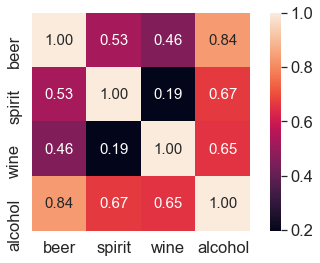

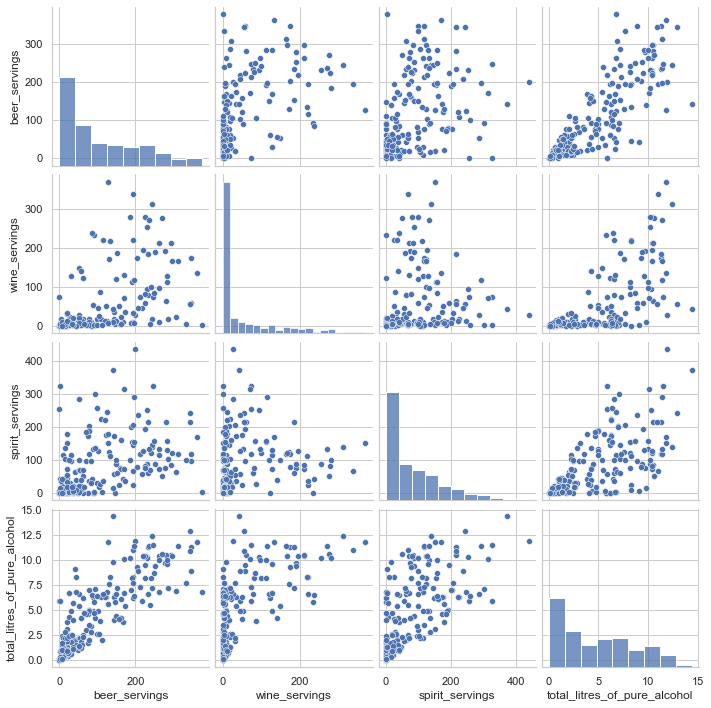

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr 행렬 히트맵을 시각화
cols_view = ['beer','spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,
                cbar = True, # 우측의 컬러바
                annot = True, # 박스 안에 글자
                square = True, # 정사각형 크기
                fmt = '.2f', # 박스 안에 글자 소수점 자리 수
                annot_kws = {'size':15}, # 박스 안에 글자 크기
                yticklabels = cols_view,
                xticklabels = cols_view)

plt.tight_layout()
plt.show()

# 시각화 라이브러리를 이용한 피처 간의 산점도 그래프를 출력
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(drinks[['beer_servings', 'wine_servings', 
                     'spirit_servings', 'total_litres_of_pure_alcohol']], height = 2.5)
plt.show()

### step 3 탐색적 분석 : 스무고개로 개념적 탐색 분석하기
- continenet 피처에 존재하는 결측 데이터를 처리
- 대륙에 대한 정보가 없는 국가를 'Others', 줄여서 'OT'라는 대륙으로 새롭게 정의
- fillna() 함수를 사용하여 drinks 데이터 프레임의 continent 피처의 결측값을 OT로 채워줌

In [26]:
# 결측 데이터 전처리 : 기타 대륙으로 통합 -> 'OT'
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


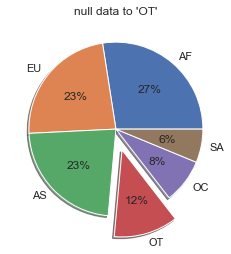

In [27]:
# 파이차트로 시각화
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode = explode, labels = labels, autopct ="%.0f%%", shadow = True)
plt.title('null data to \'OT\'')
plt.show()

In [28]:
# 미니 퀴즈
drinks['continent'].value_counts().index.tolist()

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [29]:
drinks['continent'].value_counts().values.tolist()

[53, 45, 44, 23, 16, 12]

- fracs1: 파이차트에 표현되는 각 영역의 값을 의미
- plt : 이값을 %로 변환하여 출력
- labels : 파이차트에서 각 영역의 이름을 의미. 대륙의 이름이 쓰인 부분

#### 대륙별 spirit_servings의 통계적 정보는 어느정도 일까?
- agg() 함수는 apply() 함수와 거의 동일한 기능을 하지만, apply()에 들어가는 함수 파라미터를 병렬로 설정하여  
  그룹에 대한 여러 가지 연산 결과를 동시에 얻을 수 있는 함수
- 대륙별 'spirit_servings'의 통계적 정보를 구하기 위해서는 agg에 ['mean', 'min', 'max', 'sum'] 파라미터를 입력하는 것만으로도 간단히 탐색 가능

In [30]:
# agg() 함수를 이용해 대륙별로 분석하기
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


#### 전체 평균보다 많은 알코올을 섭취하는 대륙은 어디일까?
- apply()나 agg()함수 없이도 mean()함수만을 이용한 탐색을 수행할 수 있음

In [31]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구한다
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


#### 평균 beer_servings가 가장 높은 대륙은 어디일까?
- mean()함수만 이용한 탐색에 idxmax()함수를 적용하면 평균 'beer_servings'가 가장 높은 대륙이 어디인지 찾을 수 있음
- idxmax()는 시리즈 객체에서 값이 가장 큰 index를 반환하는 기능 수행

In [33]:
# 평균 beer_servings가 가장 높은 대륙을 구한다
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


- AF, AS, EU, OC, OT 대륙 중 EU, OT, AS만이 평균보다 많이 알코올을 섭취하는 대륙인 것을 알 수 있음
- 맥주를 가장 좋아하는 대륙은 EU(유럽)

#### 시각화

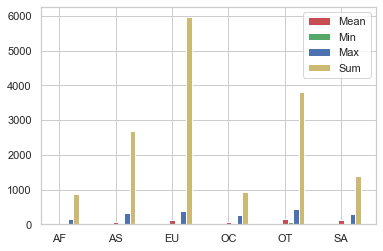

In [34]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

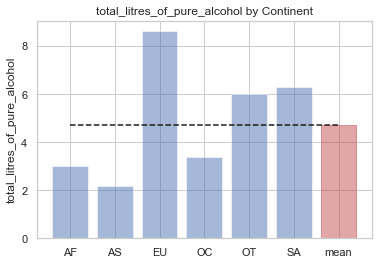

In [37]:
# 대륙별 total_litres_of_pure_alcohol을 시각화합니다.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

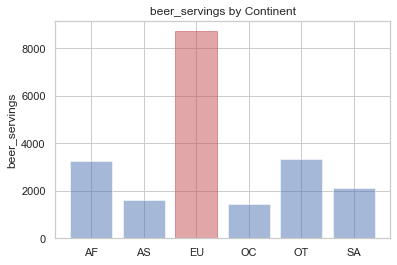

In [38]:
# 대륙별 beer_servings을 시각화합니다.
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

미니 퀴즈 1-3

In [39]:
means = result['mean'].tolist()
print(means)
mins = result['min'].tolist()
print(mins)
maxs = result['max'].tolist()
print(maxs)
sums = result['sum'].tolist()
print(sums)

[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 165.7391304347826, 114.75]
[0, 0, 0, 0, 68, 25]
[152, 326, 373, 254, 438, 302]
[866, 2677, 5965, 935, 3812, 1377]


- 각각 대륙별 beer_servings의 평균값, 최소값, 최대값, 합계

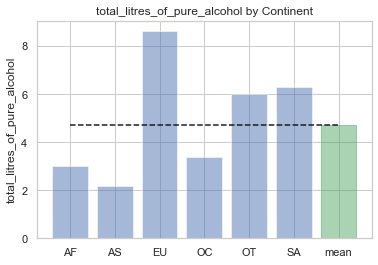

In [40]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 그래프 색상을 변경
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('g')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

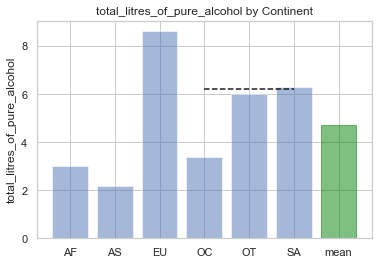

In [41]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 점선을 변경합니다.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('green')
plt.plot([3., 5], [total_mean + 1.5, total_mean + 1.5], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

### step 4 통계적 분석 : 분석 대상 간의 통계적 차이 검정하기
- 두 피처 간의 상관성을 계산하거나 그룹 단위로 나누어 수치 정보를 살펴보는 방식은 분석가의 주관에 따라 도출된 내용이기 때문에 분석 자체의 타당성을 증명하기에는 한계가 있음
- 분석 결과에 타당성을 부여하기 위해 통계적으로 차이를 검정하는 과정이 필요  


t-test
- 두 집단 간 평균의 차이에 대한 검정 방법
- 모집단의 평균 등과 같이 실제 정보를 모를 때 현재의 데이터만으로 두 집단의 차이에 대해 검정할 수 있는 방법
- 검정 대상인 두 집단의 데이터 개수가 비슷하면서 두 데이터가 정규 분포를 보이는 경우에 신뢰도가 높은 검정 방식


- 파이썬에서는 scipy라는 라이브러리를 활용하여 두 집단 간의 t-test를 검정할 수 있음
- ttest_ind()함수에 두 집단의 시리즈 데이터를 넣는 것으로 검정의 결과를 확인할 수 있음  
이 함수의 파라미터인 equal_var는 t-test의 두가지 방법 중에 하나를 선택하는 것
    - 두 집단의 분산이 같은 경우
    - 두 집단의 분산이 같지 않은 경우
    

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.  
    (env_name) pip install scipy
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [42]:
# ! pip install scipy

In [44]:
# 아프리카와 유럽간의 맥주 소비량 차이를 검정합니다.
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


- t-statistic은 t-test의 검정 통계량을 의미.  함께 출력되는 p-value와 연관지어 해석해야 함
- p-value는 가설이 얼마나 믿을만한 것인지를 나타내는 지표로, 데이터를 새로 샘플링했을때  
귀무 가설이 맞다는 전제 하에 현재 나온 통계값 이상이 나올 확률


- 만약 p-value가 너무 낮으면 귀무 가설이 일어날 확률이 너무 낮기 때문에 귀무 가설을 기각하게 됨  
보통 그 기준은 0.05나 0.01을 기준으로 하며, 이를 p-value(유의확률)


- 귀무 가설이란 처음부터 버릴 것을 예상하는 가설이며, 가설이 맞지 않다는 것을 증명하기 위해 수립하는 가설
- 반대되는 것을 대립 가설이라고 부르며, 귀무 가설이 거짓인 경우에 대안적으로 참이 되는 가설을 의미


- 등분산을 가정한 케이스와 가정하지 않은 케이스 모두 p-value가 0.000이하로 나타났음  
t-test의 귀무 가설은 '두 집단의 평균이 같다'이고 이 귀무 가설은 기각됨  
따라서 '아프리카와 유럽 대륙 간의 맥주 소비량 차이'는 통계적으로 유의미하다는 결론을 내릴 수 있음  
이는 대립 가설인 '두 집단의 평균이 다르다'를 채택한 것  
하지만 두 집단의 데이터는 크기도 다르고, 각각의 크기 또한 크지 않기 때문에 실제로 통계적인 의미를 가지는 검정이라고 보기엔 어려움   
만약 통계적 분석을 하기에 좋은 조건인 경우라면 이러한 방법을 사용할 수 있다는 것만 참고  


'대한민국은 얼마나 독하게 술을 마시는 나라일까?'
- 판단하는 기준으로, alcohol_rate 피처를 생성
- alcohol_rate는 total_litres_of_pure_alcohol 피처를 모든 술의 총 소비량(total_serving)으로 나눈 것
- alcohol_rate는 sort_values() 함수를 사용하여 국가를 기준으로 정렬

In [45]:
# '대한민국은 얼마나 술을 독하게 마시는 나라일까?'에 대한 탐색 코드 살펴보기
# total_servings 피처를 생성합니다.
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알콜 비율 피처를 생성합니다.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보를 생성합니다.
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


- x_pose = np.arange(len(country_list))를 통해 그래프의 x축에 해당하는 범위를 생성
- rank = country_with_rank.alcohol_rate.tolist()를 통해 alcohol_rate순으로 정렬된 데이터에서 alcohol_rate 값을 생성

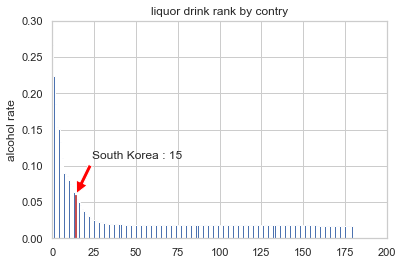

In [46]:
# 국가별 순위 정보를 그래프로 시각화합니다.
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

연습 문제

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'data/drinks.csv'
drinks = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
drinks['continent'] = drinks['continent'].fillna('OT')

In [59]:
# 대륙별 평균 wine_servings를 탐색

# 대륙별 평균 wine_servings 피처를 만들어서 병합
result = drinks.groupby('continent')['wine_servings'].mean()
df = result.to_frame().reset_index()
df = df.rename(columns={'wine_servings': 'wine_servings_cont_avg'})
drinks = pd.merge(drinks, df, on='continent', how='outer')

# 위와 같은 방법의 코드
drinks['wine_servings_cont_avg'] = drinks.groupby('continent')['wine_servings'].transform(np.mean)

# 결과 출력
drinks[['country', 'continent', 'wine_servings_cont_avg']].sample(5).head()

,country,continent,wine_servings_cont_avg
82,Slovenia,EU,142.222222
67,Latvia,EU,142.222222
187,Papua New Guinea,OC,35.625000
168,Chile,SA,62.416667
110,Ghana,AF,16.264151


- groupby 연산 결과를 반환하면, 반환 데이터의 타입은 dataframe 타입이 아님  
따라서 to_frame이라는 함수를 사용하여 dataframe 타입으로 변환한 뒤,  
다시 이 dataframe의 index를 reset_index라는 함수로 설정하는 과정이 필요  
그리고 이 과정으로 생성된 dataframe을 원래의 dataframe에 합쳐주어야 함  
이를 위해서는 merge 라는 함수를 또 새롭게 적용  
하지만 transform 함수가 있다면, 이 모든 과정을 단 한줄의 코드로 수행할 수 있음

In [61]:
# 국가별 모든 servings의 합을 계산한 total_servings라는 피처 생성

# 국가별 total_servings 피처 만들어서 병합
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 결과 출력
drinks[['country', 'beer_servings', 'wine_servings', 'spirit_servings', 'total_servings']].sample(5).head()

,country,beer_servings,wine_servings,spirit_servings,total_servings
27,Philippines,71,1,186,258
158,Nicaragua,78,1,118,197
52,Bulgaria,231,94,252,577
54,Cyprus,192,113,154,459
44,Albania,89,54,132,275


- group 단위 연산이 아닌, 일반 연산의 경우 간단한 사칙연산 기호만으로 피처를 재구성 할 수 있음  
drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings'] 처럼 간단한 코드로도,  
합계를 계산한 새로운 피처를 만들어 낼 수 있음

In [63]:
# 전체 평균보다 적은 알코올을 섭취하는 대륙 중에서, spirit을 가장 많이 마시는 국가 구하기

# 전체 평균보다 적은 알코올을 섭취하는 대륙 중에서, spirit을 가장 많이 마시는 국가를 구하기
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
continent_under_mean = continent_mean[continent_mean <= total_mean].index.tolist()
df_continent_under_mean = drinks.loc[drinks.continent.isin(continent_under_mean)]

most_spirit_under_mean = df_continent_under_mean.loc[df_continent_under_mean['spirit_servings'].idxmax()]

# 결과 출력
most_spirit_under_mean['country']

'Russian Federation'

- group 단위 연산을 적용한 결과를 바탕으로, 원하는 조건을 필터링  
여기에 isin 함수와 dataframe.loc 을 이용하여 전체 평균보다 적은 알코올을 섭취하는 대륙들을 구할 수 있음  


- isin 함수의 사용법을 조금 더 설명하자면, 만약 A[A.column_name.isin(B)] 라는 코드가 있다면,  
이것은 A라는 데이터 프레임 중, A의 column_name 피처가 B 안에 포함되어 있는 데이터만을 가져온다는 것  


- loc이라는 것은 반환된 데이터의 위치를 나타내는 것  


- 이제 이 결과에 idxmax() 함수를 사용하면, 특정 value가 가장 높은 데이터의 index를 찾을 수 있음  

In [64]:
# 술 소비량 대비 알콜 비율 구하기

# 술 소비량 대비 알콜 비율에 대한 칼럼을 만들어서 병합
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 술 소비량 대비 알콜 비율 : 전체 순위 중 한국의 순위를 구함
drinks['alcohol_rate_rank'] = drinks['alcohol_rate'].rank(ascending=False)
drinks['alcohol_rate_rank'] = drinks['alcohol_rate_rank'].apply(np.floor)
drinks.loc[drinks['country'] == 'South Korea'].alcohol_rate_rank

29    15.0
Name: alcohol_rate_rank, dtype: float64

- 새로 만들어진 'alcohol_rate' 피처를 기준으로 rank 함수를 적용  
이를 통해 한국(South Korea)이 술 소비량 대비 알콜 비율이 전체 순위 중 몇위인지 찾아보자  
rank 함수는 특정 column 내에서의 순위값을 반환해주는 함수  
한국의 술 소비량 대비 알콜 비율은 전체에서 15등

In [65]:
# 대륙별 술 소비량 대비 알콜 비율 구하기

# 대륙별 술 소비량 대비 알콜 비율을 구하기
continent_sum = drinks.groupby('continent').sum()
continent_sum['alcohol_rate_continent'] = continent_sum['total_litres_of_pure_alcohol'] / \
                                          continent_sum['total_servings']
continent_sum = continent_sum.reset_index()
continent_sum = continent_sum[['continent', 'alcohol_rate_continent']]

drinks = pd.merge(drinks, continent_sum, on='continent', how='outer')

# 결과 출력
drinks[['country', 'continent', 'alcohol_rate_continent']].sample(5).head()

,country,continent,alcohol_rate_continent
85,Switzerland,EU,0.018392
148,Cuba,OT,0.017860
21,Maldives,AS,0.020293
66,Italy,EU,0.018392
62,Greece,EU,0.018392


- 대륙별 술 소비량 대비 알콜 비율이라는 또 다른 피처를 재구성  
이 피처는 위의 예제들의 모든 함수를 골고루 사용하여 생성된 피처  